In [1]:
# 학생 성적 데이터 불러오기

import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/dat.csv')

X = df.drop(['grade'], axis = 1)
y = df.grade

#### 데이터 분할

In [ ]:
#### 데이터 분할

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2, # 데이터 비율 8:2 분할
    random_state=0, # 결과 재현을 위한 임의의 값
    shuffle= True, # 데이터 분할 전에 데이터를 섞을지 여부 
    stratify = None # 층화 샘플링 여부: 
)

# shuffle = False로 설정할 경우 stratif=None으로 설정
#shuffle=False이면 데이터의 순서를 유지하겠다는 의미이고,
#stratify는 레이블 분포를 유지하며 층화 샘플링을 하겠다는 의미입니다.
#이 둘은 상호 충돌할 수 있어서, shuffle=False일 땐 stratify=None이어야 합니다.

In [3]:
# 분할 경과 확인
print('trainX shape', train_X.shape)
print('trainy shape', train_y.shape)
print('testX shape', test_X.shape)
print('testy shape', test_y.shape)

trainX shape (292, 10)
trainy shape (292,)
testX shape (74, 10)
testy shape (74,)


In [5]:
# 층화 샘플링 (X의 school에 대해서)

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = X['school'],
    random_state = 0
)

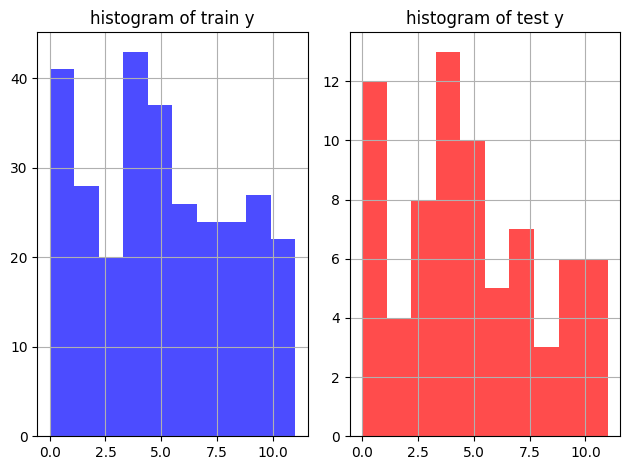

In [6]:
# Target 변수를 기준으로 훈련 데이터와 테스트 데이터의 분포 유사한지 확인
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols = 2)
train_y.hist(ax = axs[0], color = 'blue', alpha = 0.7)
axs[0].set_title('histogram of train y')

test_y.hist(ax = axs[1], color='red', alpha = 0.7)
axs[1].set_title('histogram of test y')

plt.tight_layout();
plt.show();

In [8]:
y

0       1
1       1
2       4
3       9
4       4
       ..
361     0
362     3
363    10
364     4
365     3
Name: grade, Length: 366, dtype: int64

#### 결측치 처리

In [12]:
# 결측치 조회
print(df.isna().sum(axis=0))

school       0
sex          0
paid         0
famrel       0
freetime     0
goout       10
Dalc         0
Walc         0
health       0
absences     0
grade        0
dtype: int64


- 평균 대치법
    - 일변량 변수의 평균으로 결측치를 대치하는 방법
    - 장점: 쉽고 빠르게 결측치 대치 가능
    - 단점: 다른 변수 간의 상관관계를 고려하지 못함, 결측치가 많을 때 평균값의 빈도수가 많아지므로 분포 왜곡

In [ ]:
# 평균 대치법

from sklearn.impute import SimpleImputer

# 훈련 데이터, 테스트 데이터 복사
train_X1 = train_X.copy()
test_X1 = test_X.copy()
imputer_mean = SimpleImputer(strategy='mean')

# goout 변수의 결측치를 평균으로 대치하고 저장
train_X1['goout'] = imputer_mean.fit_transform(train_X1[['goout']]) # fit() + transform()을 동시에 적용하는 메서드 / fit은 데이터를 학습, transform은 학습된 데이터 활용 데이터 변환
test_X1['goout'] = imputer_mean.transform(test_X1[['goout']])

print('학습 데이터 goout 변수 결측치 확인:', train_X1['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인:', train_X1['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인: 0
테스트 데이터 goout 변수 결측치 확인: 0


- 중앙값 대치법
    - 일변량 변수의 중앙값으로 결측치를 대치하는 방법
    - 장점: 쉽고 빠르게 결측치 대치 가능
    - 단점: 다른 변수 간의 관계를 고려하지 못함, 결측치가 많을 때 중앙값의 빈도수가 많아지므로 분포 왜곡

In [14]:
# 중앙값 대치법

train_X2 = train_X.copy()
test_X2 = test_X.copy()

imputer_median = SimpleImputer(strategy= 'median')
train_X2['goout'] = imputer_median.fit_transform(train_X2[['goout']])
test_X2['goout'] = imputer_median.fit_transform(test_X2[['goout']])

print('학습 데이터 goout 변수 결측치 확인', train_X2['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인', test_X2['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인 0
테스트 데이터 goout 변수 결측치 확인 0


- 최빈값 대치법
    - 일변량 변수의 최빈값으로 결측치를 대치하는 방법
    - 장점: 빠르고 쉽게 대치 가능
    - 단점: 상관관계 고려 못함, 클래스 불균형 심화시킬 수 있음

In [16]:
# 최빈갑 대치법

train_X3 = train_X.copy()
test_X3 = test_X.copy()

imputer_mode = SimpleImputer(strategy= 'most_frequent')
train_X3['goout'] = imputer_mode.fit_transform(train_X3[['goout']])
test_X3['goout'] = imputer_mode.fit_transform(test_X3[['goout']])

print('학습 데이터 goout 변수 결측치 확인:', train_X3['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인:', test_X3['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인: 0
테스트 데이터 goout 변수 결측치 확인: 0


- KNN을 이용한 대치법
    - k개의 이웃을 택한 후, 이웃 관측치의 정보를 활용하여 결측치를 대치하는 방법
    - 장점: 데이터에 대한 가정 없이 쉽고 빠르게 결측치 대치 가능
    - 단점: 변수 스케일 및 이상치에 민감, 고차원 데이터일 경우 모델 성능이 떨어질 수 있음

In [22]:
from sklearn.impute import KNNImputer

train_X5 = train_X.copy()
test_X5 = test_X.copy()

# 수치형 컬럼만 선택
train_X5_num = train_X5.select_dtypes('number')
test_X5_num = test_X5.select_dtypes('number')

train_X5_cat = train_X5.select_dtypes('object')
test_X5_cat = test_X5.select_dtypes('object')

# 이웃의 크기가 5인 KNN 모형의 예측값을 이용
knnimputer = KNNImputer(n_neighbors= 5)

train_X5_num_imputed = knnimputer.fit_transform(train_X5_num)  
test_X5_num_imputed = knnimputer.transform(test_X5_num)

# KNNImputer는 np.array로 출력되므로 데이터 프레임 형태로 변환
train_X5_num_imputed = pd.DataFrame(
    train_X5_num_imputed,
    columns=train_X5_num.columns,
    index=train_X5.index
)

test_X5_num_imputed = pd.DataFrame(
    test_X5_num_imputed,
    columns=test_X5_num.columns,
    index=test_X5.index
)

# 수치형 데이터 범주형 데이터 결합
train_X5 = pd.concat([train_X5_cat, train_X5_num_imputed], axis=1)
test_X5 = pd.concat([test_X5_cat, test_X5_num_imputed], axis=1)

print(train_X5['goout'].isna().sum())
print(test_X5['goout'].isna().sum())

0
0


In [24]:
# set_output(transform= 'pandas') 메서드 활용하면 pandas 데이터 프레임으로 변환

knnimputer2 = KNNImputer(n_neighbors=5).set_output(transform='pandas')
train_X5_num_imputed2 = knnimputer2.fit_transform(train_X5_num)
test_X5_num_inputed2 = knnimputer2.transform(test_X5_num)

print(train_X5_num_imputed2)

     famrel  freetime  goout  Dalc  Walc  health  absences
123     4.0       3.0    3.0   1.0   1.0     5.0       0.0
344     5.0       2.0    3.0   1.0   2.0     4.0       0.0
85      5.0       3.0    3.0   1.0   1.0     1.0       0.0
18      4.0       4.0    1.0   1.0   1.0     1.0       0.0
114     5.0       3.0    2.0   1.0   1.0     1.0       0.0
..      ...       ...    ...   ...   ...     ...       ...
318     4.0       3.0    3.0   1.0   3.0     5.0      11.0
306     4.0       3.0    3.0   1.0   2.0     4.0       4.0
340     3.0       2.0    2.0   1.0   2.0     3.0       0.0
109     5.0       5.0    4.0   1.0   2.0     5.0       6.0
213     4.0       2.0    4.0   2.0   4.0     1.0       2.0

[292 rows x 7 columns]


#### pandas 결측치 처리
- fillna()

In [31]:
data = {
    '학생': ['철수', '영희', '민수', '수지', '지현'],
    '수학': [85, np.nan, 78, np.nan, 93],
    '영어': [np.nan, 88, 79, 85, np.nan],
    '과학': [92, 85, np.nan, 80, 88]
}
df = pd.DataFrame(data)

In [26]:
# 평균으로 결측치 채우기

df1 = df.copy()
df1['수학'].fillna(df1['수학'].mean(), inplace=True)
df1['영어'].fillna(df1['영어'].mean(), inplace=True)
df1['과학'].fillna(df1['과학'].mean(), inplace=True)
print(df1)

   학생         수학    영어     과학
0  철수  85.000000  84.0  92.00
1  영희  85.333333  88.0  85.00
2  민수  78.000000  79.0  86.25
3  수지  85.333333  85.0  80.00
4  지현  93.000000  84.0  88.00


In [27]:
# 지정 값 결측치 채우기

df2 = df.copy()
df2['수학'].fillna(0, inplace=True)
print(df2)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희   0.0  88.0  85.0
2  민수  78.0  79.0   NaN
3  수지   0.0  85.0  80.0
4  지현  93.0   NaN  88.0


In [ ]:
# 앞의 값으로 결측치 채우기 

df2['영어'].fillna(method='ffill', inplace=True)
print(df2)

# 영어의 첫번째 행은 앞에 값으로 채울 값이 없어 NaN

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희   0.0  88.0  85.0
2  민수  78.0  79.0   NaN
3  수지   0.0  85.0  80.0
4  지현  93.0  85.0  88.0


In [30]:
# 뒤에 값으로 결측치채우기
df2['과학'].fillna(method='bfill', inplace=True)
print(df2)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희   0.0  88.0  85.0
2  민수  78.0  79.0  80.0
3  수지   0.0  85.0  80.0
4  지현  93.0  85.0  88.0


In [32]:
# 다른 컬럼의 값을 사용하여 결측치 채우기

df3 = df.copy()
df3['수학'].fillna(df3['영어'], inplace=True)
print(df3)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희  88.0  88.0  85.0
2  민수  78.0  79.0   NaN
3  수지  85.0  85.0  80.0
4  지현  93.0   NaN  88.0


In [38]:
# 각 컬럼의 평균값으로 결측치 채우기

df4 = df.copy()
df4_num = df4.select_dtypes('number')
df4_num= df4_num.apply(lambda col: col.fillna(col.mean()))
df4[df4_num.columns] = df4_num

print(df4)

   학생         수학    영어     과학
0  철수  85.000000  84.0  92.00
1  영희  85.333333  88.0  85.00
2  민수  78.000000  79.0  86.25
3  수지  85.333333  85.0  80.00
4  지현  93.000000  84.0  88.00


#### 범주형 변수 처리

In [39]:
train_X.head()

,school,sex,paid,famrel,freetime,goout,Dalc,Walc,health,absences
123,GP,F,no,4,3,3.0,1,1,5,0
344,MS,F,yes,5,2,3.0,1,2,4,0
85,GP,F,yes,5,3,3.0,1,1,1,0
18,GP,M,no,4,4,1.0,1,1,1,0
114,GP,F,no,5,3,2.0,1,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder # 입력 형식으로 1차원 배열 혹은 시리즈 형식 보통 종속변수 전처리에 활용
from sklearn.preprocessing import OrdinalEncoder # 입력 형식으로 2차원 혹은 데이터 프렝미 형식 독립변수 전처리에 활용

train_X6 = train_X.copy()
test_X6 = test_X.copy()

train_X6_cat = train_X6.select_dtypes('object')
test_X6_cat = test_X6.select_dtypes('object')

In [41]:
ordinalencoder = OrdinalEncoder().set_output(transform='pandas')
train_X6_cat = ordinalencoder.fit_transform(train_X6_cat)
test_X6_cat = ordinalencoder.fit_transform(test_X6_cat)

print(train_X6_cat.head(2))

     school  sex  paid
123     0.0  0.0   0.0
344     1.0  0.0   1.0


In [42]:
test_X6_cat

,school,sex,paid
278,0.0,1.0,1.0
185,0.0,0.0,0.0
323,0.0,1.0,1.0
202,0.0,0.0,0.0
128,0.0,1.0,0.0
...,...,...,...
32,0.0,0.0,0.0
348,1.0,0.0,0.0
313,0.0,0.0,1.0
193,0.0,0.0,1.0


In [43]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder

train_X7 = train_X.copy()
test_X7 = test_X.copy()

train_X7_cat = train_X7.select_dtypes('object')
test_X7_cat = test_X7.select_dtypes('object')

In [ ]:
onehotencoder = OneHotEncoder(sparse_output = False, # 희소행렬 표현 즉 0이 아닌 좌표와 값만 저장 -> 메모리 절약
                              handle_unknown= 'ignore').set_output(transform='pandas') # handle_unknown= 'ignore' 학습되지 않은 범주가 테스트 데이터에 존재할 경우 오류 방지

train_X7_cat = onehotencoder.fit_transform(train_X7_cat)
test_X7_cat = onehotencoder.transform(test_X7_cat)

print(train_X7_cat.head())


     school_GP  school_MS  sex_F  sex_M  paid_no  paid_yes
123        1.0        0.0    1.0    0.0      1.0       0.0
344        0.0        1.0    1.0    0.0      0.0       1.0
85         1.0        0.0    1.0    0.0      0.0       1.0
18         1.0        0.0    0.0    1.0      1.0       0.0
114        1.0        0.0    1.0    0.0      1.0       0.0


In [ ]:
# Dummy encoding: 원핫 인코딩 칼럼 - 1 만큼 생성

train_X8 = train_X.copy()
test_X8 = test_X.copy()

train_X8_cat = train_X8.select_dtypes('object')
test_X8_cat = test_X8.select_dtypes('object')

In [46]:
dummyencoder = OneHotEncoder(sparse_output= False,
                             drop='first',
                             handle_unknown='error').set_output(transform='pandas')

train_X8_cat = dummyencoder.fit_transform(train_X8_cat)
test_X8_cat = dummyencoder.transform(test_X8_cat)

In [47]:
print(train_X8_cat.head())

     school_MS  sex_M  paid_yes
123        0.0    0.0       0.0
344        1.0    0.0       1.0
85         0.0    0.0       1.0
18         0.0    1.0       0.0
114        0.0    0.0       0.0


### 변수 변환 및 스케일링

### 변수변환
- 데이터 치우침이 있을 때 변수 변환을 통해 정규분포 형태로 변환하는 것을 고려해볼 수 있음
    - Box-cox 변환
    - Yeo-Johnson 변환

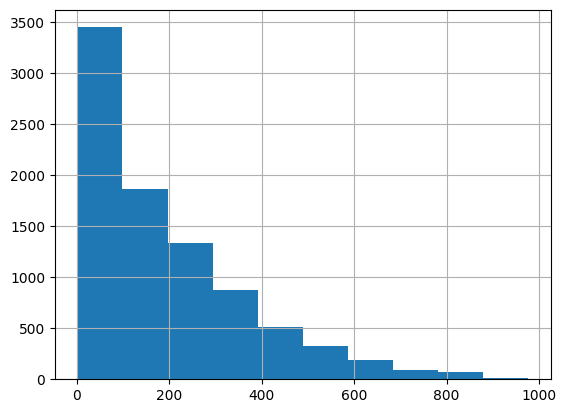

In [48]:
# 변수변환

from sklearn.preprocessing import PowerTransformer
import warnings
import matplotlib.pyplot as plt
np.warnings = warnings

bike_data = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bike_train.csv')
bike_data['count'].hist();
plt.show();

In [49]:
box_tr = PowerTransformer(method= 'box-cox')
bike_data['count_boxcox'] = box_tr.fit_transform(bike_data[['count']])
print('lambda' ,box_tr.lambdas_)

lambda [0.31309736]


In [50]:
# 로그 변환
bike_data['count_log'] = np.log1p(bike_data[['count']])

In [ ]:
#루트변환
bike_data['count_sqrt'] = np.sqrt(bike_data[['count']])

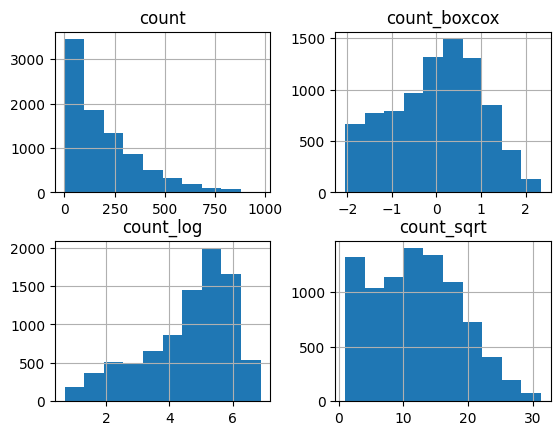

In [52]:
# 비교
bike_data[['count', 'count_boxcox', 'count_log', 'count_sqrt']].hist()

plt.show()

### 정규화


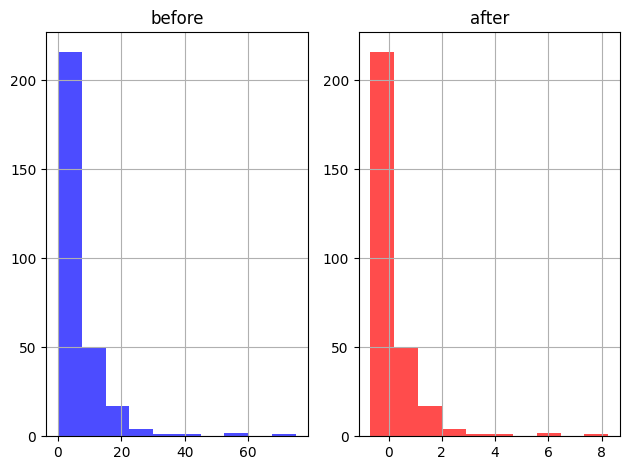

In [56]:
# 표준화 (x-평균)/표준편차 -> 평균을 0 표준편차를 1로 조정

from sklearn.preprocessing import StandardScaler

train_X9 = train_X.copy()
test_X9 = test_X.copy()

train_X9_num = train_X9.select_dtypes('number')
test_X9_num = test_X9.select_dtypes('number')

# 표준화

stdscaler = StandardScaler().set_output(transform='pandas')
train_X9_num = stdscaler.fit_transform(train_X9_num)
test_X9_num = stdscaler.transform(test_X9_num)

# 시각화

fig, axs = plt.subplots(nrows = 1, ncols = 2)
train_X9['absences'].hist(ax = axs[0], color='blue', alpha = 0.7)
axs[0].set_title('before')

train_X9_num['absences'].hist(ax = axs[1], color='red', alpha = 0.7)
axs[1].set_title('after')
plt.tight_layout();
plt.show();

In [60]:
print('변환 전 평균',np.round(train_X9['absences'].mean()))
print('변환 후 평균',np.round(train_X9_num['absences'].mean()))
print('변환 전 표준편차',np.round(train_X9['absences'].std(), 2))
print('변환 후 표준편차',np.round(train_X9_num['absences'].std(), 2))

변환 전 평균 6.0
변환 후 평균 0.0
변환 전 표준편차 8.42
변환 후 표준편차 1.0


In [62]:
# min-max 정규화 (x-최솟값)/(최댓값-최솟값) 데이터 범위를 0~1로 조정

from sklearn.preprocessing import MinMaxScaler

train_X10 = train_X.copy()
test_X10 = test_X.copy()

train_X10_num = train_X10.select_dtypes('number')
test_X10_num = test_X10.select_dtypes('number')

minmaxscaler = MinMaxScaler().set_output(transform='pandas')
train_X10_num = minmaxscaler.fit_transform(train_X10_num)
test_X10_num = minmaxscaler.transform(test_X10_num)

range_df = train_X10_num.select_dtypes('number').apply(lambda x:x.max()-x.min(), axis=0)
print("Range of each column:")
print(range_df)

Range of each column:
famrel      1.0
freetime    1.0
goout       1.0
Dalc        1.0
Walc        1.0
health      1.0
absences    1.0
dtype: float64


In [63]:
# 이상치 처리

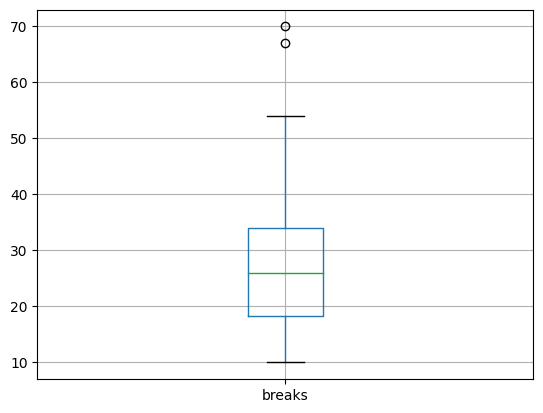

In [65]:
warpbreaks = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/warpbreaks.csv')
warpbreaks.boxplot(column=['breaks']);
plt.show()

In [66]:
warpbreaks.head()

,breaks,wool,tension
0,26,A,L
1,30,A,L
2,54,A,L
3,25,A,L
4,70,A,L


In [83]:
# 1분위수 계산
Q1 = np.quantile(warpbreaks['breaks'], 0.25)
# 3분위수 계산
Q3 = np.quantile(warpbreaks['breaks'], 0.75)

IQR = Q3 - Q1

UC = Q3 + (1.5 * IQR) # 상한선 이 값 보다 크면 이상치 간주
LC = Q1 - (1.5 * IQR) # 하한선 이 값 보다 작으면 이상치 간주

print(warpbreaks.loc[(warpbreaks.breaks > UC) | (warpbreaks.breaks < LC), : ]) # 이상치 판단

   breaks wool tension
4      70    A       L
8      67    A       L


In [84]:
# 이상치 제외 값

warpbreaks.loc[(warpbreaks.breaks <= UC) & (warpbreaks.breaks >=LC), :]

,breaks,wool,tension
0,26,A,L
1,30,A,L
2,54,A,L
3,25,A,L
5,52,A,L
6,51,A,L
7,26,A,L
9,18,A,M
10,21,A,M
11,29,A,M


#### Z-score를 이용한 방법
- z-score의 특정 값을 기준으로 이상치를 판별하는 방법
- (x-평균)/ 표준편차
- 평균을 중심으로 표준편차 대비 몇 배 떨어져 있는지를 기준으로 이상치 정의
- 이상치 판별 기준 Z>3

In [86]:
upper = warpbreaks['breaks'].mean() + (3*warpbreaks['breaks'].std()) # 상한선
lower = warpbreaks['breaks'].mean() - (3*warpbreaks['breaks'].std()) # 하한선

warpbreaks.loc[(warpbreaks['breaks'] > upper) | (warpbreaks['breaks'] < lower), :].head()

,breaks,wool,tension
4,70,A,L


#### 이산화 방법
- 수치형 변수를 그룹핑하여 범주형 변수로 변환하는 것

In [87]:
from sklearn.preprocessing import KBinsDiscretizer

X = np.array([[0,1,1,2,5,10,11,14,18]]).T

# 구간의 길이가 같도록 이산화
kbd = KBinsDiscretizer(n_bins=3, # 구간의 개수 3
                       strategy='uniform') # 구간 길이 동일
X_bin = kbd.fit_transform(X).toarray()
print(kbd.bin_edges_) ###3 각 구간의 경계값 확인

[array([ 0.,  6., 12., 18.])]


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [90]:
# 분위수를 기준으로 이산화
kbd2 = KBinsDiscretizer(n_bins=4, strategy= 'quantile') # 사분위수를 기준으로 이산화
X_bin2 = kbd2.fit_transform(X).toarray()
print(kbd2.bin_edges_)

[array([ 0.,  1.,  5., 11., 18.])]


In [91]:
print(np.quantile(X, [0, 0.25, 0.75, 1]))

[ 0.  1. 11. 18.]


In [92]:
# 구간을 임의로 설정하는 방법
bins = [0, 4, 7, 11, 18]
labels = ['A', 'B', 'C', 'D']
X_bin3 = pd.cut(X.reshape(-1),
                bins = bins, # 구간의 경계값 설정
                labels = labels)
print(X_bin3)

[NaN, 'A', 'A', 'A', 'B', 'C', 'C', 'D', 'D']
Categories (4, object): ['A' < 'B' < 'C' < 'D']


#### 차원 축소와 데이터 누수 방지
- 차원 축소
    - 고차원 데이터를 저차원으로 변환하는 기법 - 데이터를 시각화 할 때 필요
    - 필요성
        - 차원의 저주
            1. 데이터 희소성: 고차원 공간에서는 공간 내의 데이터 희소해지므로 데이터 간의 패턴을 찾기 어려워짐
            2. 계산의 복잡성
            3. 과적합

#### 주성분 분석
- 차원 축소의 대표적 기법
- 고차원 데이터를 저차원 변환하며 데이터 정보를 유지하는데 중점을 둡

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/df_5.csv')
df.columns = ['index', 'X100m', 'Long.jump', 'Shot.put', 'High.jump', 'X400m', 'X110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', 'X1500m']  # 컬럼 이름 변경
df.set_index('index', inplace=True)
display(df.head())
print(df.shape)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
index,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0


(23, 10)


In [97]:
# 훈련 데이터 테스트 데이터 분리
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [98]:
# 주성분 분석 진행 전 사전 전처리 표준화 수행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [100]:
# PCA 주성분 분석 적용
from sklearn.decomposition import PCA
pca = PCA(n_components=10, # 주성분의 수 (줄이고 싶은 차원의 수)
          svd_solver= 'auto') # 주성분 분석 계산 방식

X_train_pca = pca.fit_transform(train_scaled)
X_test_pca = pca.transform(test_scaled)

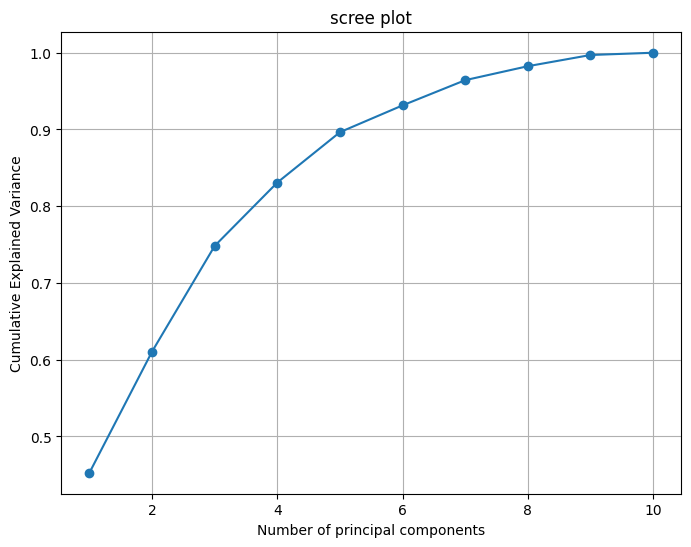

In [103]:
# 주 성분의 수 설정 (스크리 플롯 활용)

import matplotlib.pyplot as plt
cumulative_expained_variance = np.cumsum(pca.explained_variance_ratio_)

# 스크리 플롯
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_expained_variance) + 1),
               cumulative_expained_variance, marker='o', linestyle='-')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative Explained Variance')
plt.title('scree plot')
plt.grid(True)
plt.show()

In [ ]:
# 스크리 플롯을 그리지 않고 주성분 수 정하는 방법

pca = PCA(n_components= 0.8, # 설명되는 누적 분산의 비율 80% 수준 설정 / 0.8로 설정할 경우 svd_solver Full 설정
          svd_solver='full') # 주성분 분석 계산 방식

X_train_pca = pca.fit_transform(train_scaled)
X_test_pca = pca.transform(test_scaled)

In [106]:
print(pca.explained_variance_ratio_)
print(pca.n_components_)

[0.45268178 0.15791668 0.1376982  0.08256299]
4


#### 데이터 누수


In [107]:
from sklearn.preprocessing import StandardScaler

trainX = pd.DataFrame({'x1': range(1,9,1), 'x2': range(15, 23, 1)})
testX = pd.DataFrame({'x1': [1,3,5], 'x2': [2,4,6]})

In [108]:
stdscaler = StandardScaler()
tarinX2 = stdscaler.fit_transform(trainX)

testX2 = stdscaler.fit(testX)

In [ ]:
(1 - np.mean(trainX['x1']))/ np.std(trainX['x1'])